In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.metrics import precision_score, recall_score

In [ ]:
presion_arterial = np.random.uniform(70, 180, 1500)
colesterol = np.random.uniform(120, 250, 1500)
prob_riesgo = (presion_arterial - 120) / 50 + (colesterol - 180) / 50
prob_riesgo = np.clip(prob_riesgo, 0, 1)
X = np.column_stack((presion_arterial, colesterol))
y = prob_riesgo > 0.5

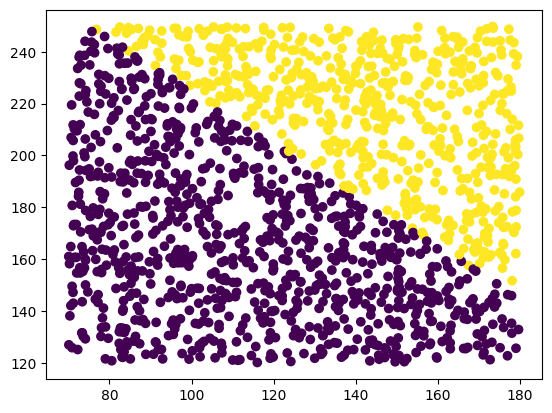

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Primera configuración

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
clf = MLPClassifier()

clf.fit(X_train, y_train)

MLPClassifier()

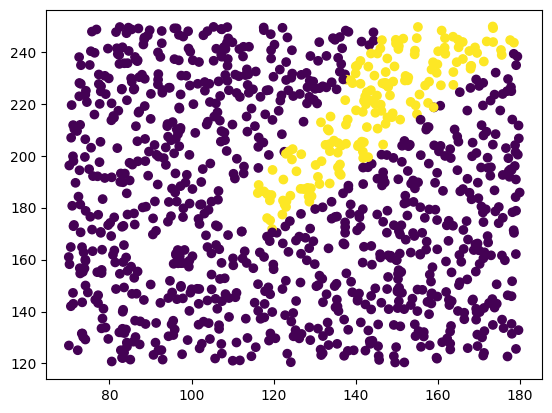

In [ ]:
y_pred = clf.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

In [ ]:
precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.8125, 0.31026252983293556)

Se ha utilizado la configuración por defecto y los resultados no son del todo precisos. Para este problema, al tratar de detectar un problema médico, se tiene en mas valor el recall que la precisión porque, en referencia a la teoría impartida, es crucial no perder casos positivos, incluso si hay falsos positivos.

Segunda configuración

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
clf = MLPClassifier(
    solver="adam",
    alpha=1e-4,
    hidden_layer_sizes=(50,10),
    random_state=1
)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 10), random_state=1)

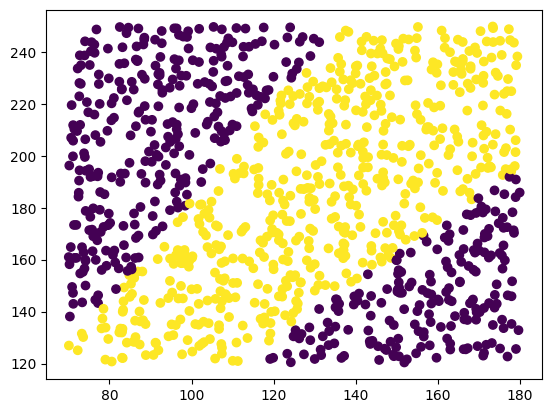

In [ ]:
y_pred = clf.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

In [ ]:
precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.4747292418772563, 0.655860349127182)

Para esta configuración, respecto al anterior, solamente se ha cambiado el tamaño de las capas ocultas. No ha sido capaz de discriminar la relación de las dos variables, respecto a la propabilidad de tener problemas cardiovasculares. Se concluye que no es un modelo fiable.

Tercera configuración

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
clf = MLPClassifier(
    solver="lbfgs",
    alpha=1e-5,
    hidden_layer_sizes=(500,),
    random_state=1,
    max_iter=500
)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(500,), max_iter=500,
              random_state=1, solver='lbfgs')

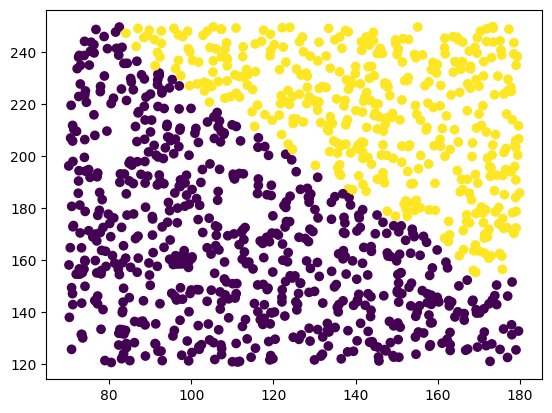

In [ ]:
y_pred = clf.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

In [ ]:
precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9951338199513382, 0.9855421686746988)

Para esta configuración los cambios realizados son: cambio del modelo a "lbfgs", se ha disminuido el valor de "alpha", se ha aumentado el tamaño de capas ocultas considerablemente y se ha incrementado la cantidad de iteraciones para que el modelo pueda llegar a converger.
Con estos cambios se ha logrado mejorar drásticamente los resultados y el modelo ha sido capaz de aprender cuando un paciente sufre de problemas cardiovasculares o no.